# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset

In [3]:
ranking = pd.read_csv('./datasets/created/rank_copa_america.csv')
ranking.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
223,2024-06-09,Argentina,Ecuador,1,0,Friendly,Chicago,United States,True,1855.20,1855.20,1.0,0.0,1519.20,1519.20,31.0,-1.0
224,2024-06-11,Chile,Paraguay,3,0,Friendly,Santiago,Chile,False,1489.82,1489.82,42.0,2.0,1430.73,1430.73,56.0,3.0
225,2024-06-12,Ecuador,Bolivia,3,1,Friendly,Chester,United States,True,1519.20,1519.20,31.0,-1.0,1284.55,1284.55,86.0,1.0
226,2024-06-15,Colombia,Bolivia,3,0,Friendly,Denver,United States,True,1655.29,1655.29,14.0,0.0,1284.55,1284.55,86.0,1.0
227,2024-06-16,Panama,Paraguay,0,1,Friendly,Panama City,Panama,False,1475.62,1475.62,44.0,3.0,1430.73,1430.73,56.0,3.0


In [4]:
def result_finder(home, away):
    if home > away:
        return pd.Series([0, 3, 0])
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = ranking.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)

In [5]:
ranking[["result", "home_team_points", "away_team_points"]] = results
ranking.tail()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away,result,home_team_points,away_team_points
223,2024-06-09,Argentina,Ecuador,1,0,Friendly,Chicago,United States,True,1855.20,1855.20,1.0,0.0,1519.20,1519.20,31.0,-1.0,0,3,0
224,2024-06-11,Chile,Paraguay,3,0,Friendly,Santiago,Chile,False,1489.82,1489.82,42.0,2.0,1430.73,1430.73,56.0,3.0,0,3,0
225,2024-06-12,Ecuador,Bolivia,3,1,Friendly,Chester,United States,True,1519.20,1519.20,31.0,-1.0,1284.55,1284.55,86.0,1.0,0,3,0
226,2024-06-15,Colombia,Bolivia,3,0,Friendly,Denver,United States,True,1655.29,1655.29,14.0,0.0,1284.55,1284.55,86.0,1.0,0,3,0
227,2024-06-16,Panama,Paraguay,0,1,Friendly,Panama City,Panama,False,1475.62,1475.62,44.0,3.0,1430.73,1430.73,56.0,3.0,1,0,3


<Axes: >

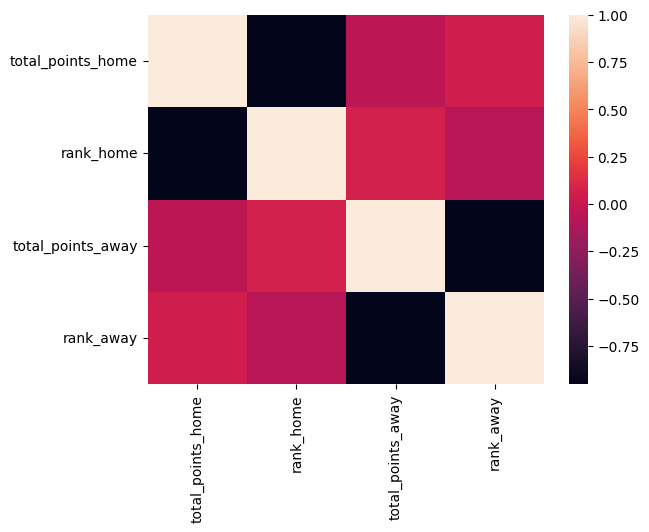

In [6]:
import seaborn as sns

sns.heatmap(ranking[["total_points_home", "rank_home", "total_points_away", "rank_away"]].corr())

In [7]:
ranking["rank_dif"] = ranking["rank_home"] - ranking["rank_away"]
ranking["sg"] = ranking["home_score"] - ranking["away_score"]
ranking["points_home_by_rank"] = ranking["home_team_points"]/ranking["rank_away"]
ranking["points_away_by_rank"] = ranking["away_team_points"]/ranking["rank_home"]

In [8]:
home_team = ranking[["date", "home_team", "home_score", "away_score", "rank_home", "rank_away","rank_change_home", "total_points_home", "result", "rank_dif", "points_home_by_rank", "home_team_points"]]

away_team = ranking[["date", "away_team", "away_score", "home_score", "rank_away", "rank_home","rank_change_away", "total_points_away", "result", "rank_dif", "points_away_by_rank", "away_team_points"]]

In [9]:
home_team.columns = [h.replace("home_", "").replace("_home", "").replace("away_", "suf_").replace("_away", "_suf") for h in home_team.columns]

away_team.columns = [a.replace("away_", "").replace("_away", "").replace("home_", "suf_").replace("_home", "_suf") for a in away_team.columns]

In [11]:
team_stats = pd.concat([home_team, away_team], axis=0)

In [13]:
team_stats.head()

,date,team,score,suf_score,rank,rank_suf,rank_change,total_points,result,rank_dif,points_by_rank,team_points
0,2020-10-08,Paraguay,2,2,40.0,22.0,-1.0,1461.0,2,18.0,0.045455,1
1,2020-10-08,Uruguay,2,1,6.0,17.0,1.0,1645.0,0,-11.0,0.176471,3
2,2020-10-08,Argentina,1,0,9.0,64.0,0.0,1623.0,0,-55.0,0.046875,3
3,2020-10-09,Colombia,3,0,10.0,25.0,0.0,1622.0,0,-15.0,0.120000,3
4,2020-10-09,Brazil,5,0,3.0,75.0,0.0,1712.0,0,-72.0,0.040000,3


In [14]:
stats_val = []

for index, row in team_stats.iterrows():
    team = row["team"]
    date = row["date"]
    past_games = team_stats.loc[(team_stats["team"] == team) & (team_stats["date"] < date)].sort_values(by=['date'], ascending=False)
    last5 = past_games.head(5)
    
    goals = past_games["score"].mean()
    goals_l5 = last5["score"].mean()
    
    goals_suf = past_games["suf_score"].mean()
    goals_suf_l5 = last5["suf_score"].mean()
    
    rank = past_games["rank_suf"].mean()
    rank_l5 = last5["rank_suf"].mean()
    
    if len(last5) > 0:
        points = past_games["total_points"].values[0] - past_games["total_points"].values[-1]#qtd de pontos ganhos
        points_l5 = last5["total_points"].values[0] - last5["total_points"].values[-1] 
    else:
        points = 0
        points_l5 = 0
        
    gp = past_games["team_points"].mean()
    gp_l5 = last5["team_points"].mean()
    
    gp_rank = past_games["points_by_rank"].mean()
    gp_rank_l5 = last5["points_by_rank"].mean()
    
    stats_val.append([goals, goals_l5, goals_suf, goals_suf_l5, rank, rank_l5, points, points_l5, gp, gp_l5, gp_rank, gp_rank_l5])

In [15]:
stats_mean = ["goals_mean", "goals_mean_l5", "goals_suf_mean", "goals_suf_mean_l5", "rank_mean", "rank_mean_l5", "points_mean", "points_mean_l5", "game_points_mean", "game_points_mean_l5", "game_points_rank_mean", "game_points_rank_mean_l5"]

In [16]:
stats_df = pd.DataFrame(stats_val, columns=stats_mean)

full_df = pd.concat([team_stats.reset_index(drop=True), stats_df], axis=1, ignore_index=False)

In [17]:
home_team_stats = full_df.iloc[:int(full_df.shape[0]/2),:]
away_team_stats = full_df.iloc[int(full_df.shape[0]/2):,:]

In [18]:
home_team_stats = home_team_stats[home_team_stats.columns[-12:]]
away_team_stats = away_team_stats[away_team_stats.columns[-12:]]

In [19]:
home_team_stats.columns = ['home_'+str(col) for col in home_team_stats.columns]
away_team_stats.columns = ['away_'+str(col) for col in away_team_stats.columns]

In [20]:
match_stats = pd.concat([home_team_stats, away_team_stats.reset_index(drop=True)], axis=1, ignore_index=False)


In [22]:
full_df = pd.concat([ranking, match_stats.reset_index(drop=True)], axis=1, ignore_index=False)


In [23]:
def find_friendly(x):
    if x == "Friendly":
        return 1
    else: return 0

full_df["is_friendly"] = full_df["tournament"].apply(lambda x: find_friendly(x)) 

In [24]:
full_df = pd.get_dummies(full_df, columns=["is_friendly"])


In [25]:
base_df = full_df[["date", "home_team", "away_team", "rank_home", "rank_away","home_score", "away_score","result", "rank_dif", "rank_change_home", "rank_change_away", 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
       'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
       'home_points_mean_l5', 'away_goals_mean', 'away_goals_mean_l5',
       'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
       'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5','home_game_points_mean', 'home_game_points_mean_l5',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_l5','away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5',
       'is_friendly_0', 'is_friendly_1']]

In [26]:
base_df_no_fg = base_df.dropna()


In [ ]:
import os

folder_name = "created"
datasets_folder = "./datasets"

new_folder_path = os.path.join(datasets_folder, folder_name)
os.makedirs(new_folder_path, exist_ok=True)

country_final = country_final.sort_values('overall', ascending=False)
country_final.to_csv('./datasets/created/country_final.csv',index=False)